In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# -*- coding: utf-8 -*-
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Softmax, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical
# from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
import matplotlib.pyplot as plt
import pandas as pd
#from data_pp_mmwave import *
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model

import os

In [42]:
import numpy as np
import pickle

def read_from_pickle(path, time_steps = 5):
    f = open(path,'rb')
    x = pickle.load(f)
    f.close()
    keys = ['x', 'y']
    for time_segment in range(len(x)//time_steps):
        #print('time segment'+str(time_segment) + 'range' + str(range(len(x)//time_steps)))
        for t in range(time_steps):
            s = np.array([x[time_segment*time_steps+t].get(k).mean() for k in keys])
            if t == 0:
                sample = s
            else:
                sample = np.vstack((sample , s))

        sample = np.expand_dims(sample, axis=0)
        #print(sample)
        if time_segment == 0:
            data = sample
        else:
            data = np.vstack((data, sample))
    return data

In [43]:
from pandas import read_csv
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
from keras.utils import to_categorical

%matplotlib inline

import os

data_dir = "/content/drive/MyDrive/Colab Notebooks/breathingdata/breathing_data.pkl"

step = 12
data  = read_from_pickle(data_dir, step)
data = data.reshape(-1,2)
data.shape


(43032, 2)

In [44]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
    
df_unscaled = pd.DataFrame(data,columns=['x','y']) 

df_unscaled

,x,y
0,-0.341283,0.616262
1,-0.408203,0.599981
2,-0.461914,0.486028
3,-0.194901,0.683388
4,-0.293203,0.604609
...,...,...
43027,-0.233724,0.475477
43028,-0.206380,0.508626
43029,-0.171875,0.580078
43030,-0.174316,0.551758


In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
    
df_unscaled = pd.DataFrame(data)    
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unscaled)
df_scaled

array([[-0.5149291 ,  0.01773115],
       [-0.95548426, -0.08275715],
       [-1.30907883, -0.78609627],
       ...,
       [ 0.60033187, -0.20560305],
       [ 0.58425939, -0.38040013],
       [ 0.47175203, -0.21765802]])

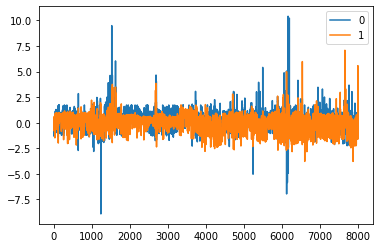

In [46]:
df_scaled
df = pd.DataFrame(df_scaled[0:8000])

df
df.plot()

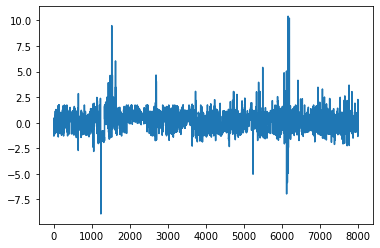

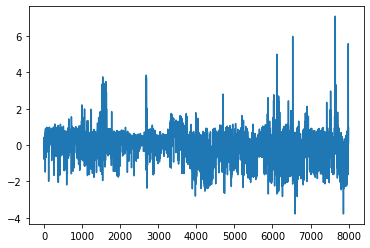

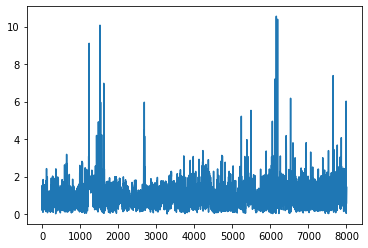

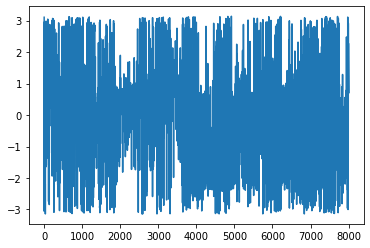

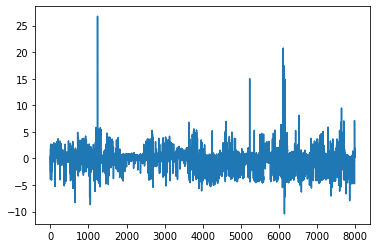

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(df[0])
plt.show()

plt.plot(df[1])
plt.show()


# build polar co-ordinates showing angle and velocity

x,y = df[0], df[1]
r = np.sqrt(x**2+y**2)
t = np.arctan2(y,x)

plt.plot(r)
plt.show()

plt.plot(t)
plt.show()

wave = np.array(r)*np.array(t)

plt.plot(wave)
plt.show()

#print(r)
#print(t)



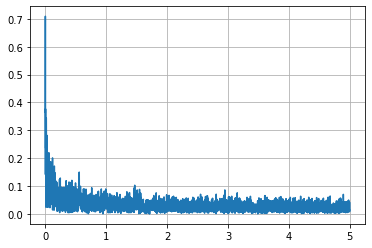

In [48]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 8000
# sample spacing
T = 1.0 / 10.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.array(r) * np.array(t)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]


import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


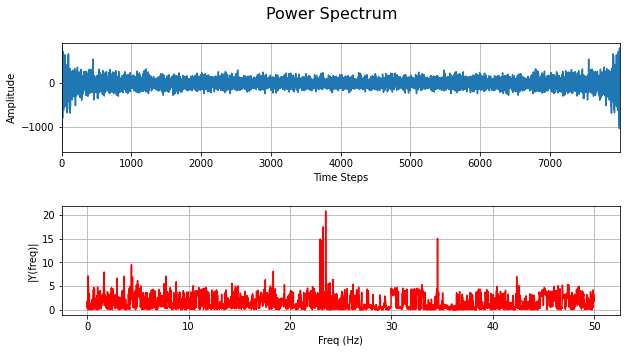

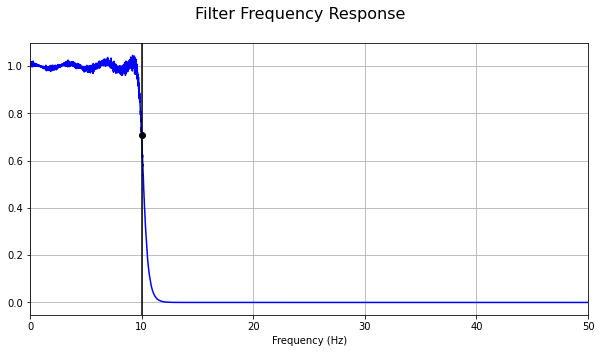

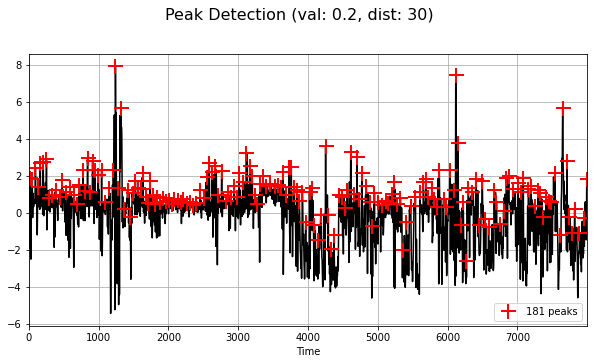

 - Number of steps: 181


In [51]:
#!pip install sensormotion
from scipy.fft import fft, fftfreq
import sensormotion as sm

time = np.arange(8000) # times in milliseconds

_ = sm.signal.fft(yf, 100, plot=True)

#creating a low pass filter with frequency set to 10 hz

sm.plot.plot_filter_response(10, 100, 'low', filter_order=30)
b, a = sm.signal.build_filter(10, 100, 'low', filter_order=30)

# applying the low pass filter

y_f = sm.signal.filter_signal(b, a, y)  # on signal y which is a composite signal of polar coordinates.
peak_times, peak_values = sm.peak.find_peaks(time, y_f, peak_type='peak', min_val=0.2, min_dist=30, plot=True)

# Gait metrics peaking finding which translates to chest motion 

step_count = sm.gait.step_count(peak_times)
cadence = sm.gait.cadence(time, peak_times)

step_time, step_time_sd, step_time_cov = sm.gait.step_time(peak_times)

# Number of steps indicate a change in breathing pattern
print(' - Number of steps: {}'.format(step_count))

In [52]:
avg_rate = step_count/12

print("Average breathing rate over 12 mins is " + str(avg_rate) + " (b/min) breaths per minute")

Average breathing rate over 12 mins is 15.083333333333334 (b/min) breaths per minute
